24
[0.1206362  0.12956775 0.14591654 0.16968258 0.20086588 0.23946642
 0.28548422 0.33891927 0.39977156 0.46804111 0.54372791 0.62683196
 0.71735326 0.81529181 0.92064761 1.03342066 1.15361097 1.28121852
 1.41624332 1.55868538 1.70854468 1.86582124 2.03051505 2.2026261 ]
24
[0.00425 0.05492 0.12672 0.21417 0.2705  0.28007 0.38004 0.3974  0.43154
 0.47486 0.57908 0.69851 0.74552 0.79445 0.85325 0.92978 1.11198 1.27566
 1.30533 1.5551  1.62295 1.75437 2.08192 2.43052]
p-value: 0.9876829291329101


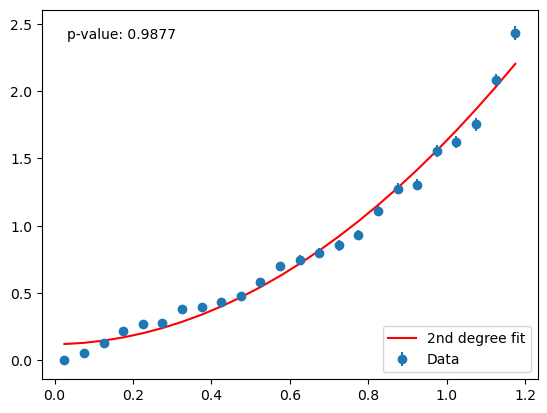

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
data = pd.read_csv("./08_homework.dat", delim_whitespace=True, header=None)
x = data[0].to_numpy()
y = data[1].to_numpy()
dy = data[2].to_numpy()

# Fit a 2nd degree polynomial to the data
degree = 2
coeffs = np.polyfit(x, y, degree)
y_fit = np.polyval(coeffs, x)
print(len(y_fit))
print(y_fit)
print(len(y))
print(y)
# Fit the data to a 2nd order polynomial

# Calculate the residuals
residuals = y - y_fit

# Calculate the degrees of freedom
n = degree
df = len(x) - n

# Calculate the chi-square statistic
chi2 = np.sum(((residuals / y.std()) ** 2) / dy)

# Calculate the p-value
p_value = 1 - stats.chi2.cdf(chi2, df)

print("p-value:", p_value)
# Plot the data and the fitted polynomial
plt.errorbar(x, y, yerr=dy, fmt="o", label="Data")  # Add error bars to the plot
plt.plot(x, y_fit, color="red", label="2nd degree fit")
plt.text(
    0.05,
    0.95,
    f"p-value: {p_value:.4f}",
    transform=plt.gca().transAxes,
    ha="left",
    va="top",
)
plt.legend(loc="lower right")
plt.show()

In [32]:
# Fit the data to a 2nd order polynomial
coefficients = np.polyfit(x, y, 12)
p = np.poly1d(coefficients)

# Calculate the residuals
y_pred = p(x)
residuals = y - y_pred

# Calculate the degrees of freedom
n = 1
df = len(x) - n

# Calculate the chi-square statistic
chi2 = np.sum(((residuals / y.std()) ** 2) / dy)

# Calculate the p-value
p_value = 1 - stats.chi2.cdf(chi2, df)

print("p-value:", p_value)
# Plot the data and the fitted polynomial
plt.errorbar(x, y, yerr=dy, fmt="o", label="Data")  # Add error bars to the plot
plt.plot(x, y_fit, color="red", label="2nd degree fit")
plt.text(
    0.05,
    0.95,
    f"p-value: {p_value:.4f}",
    transform=plt.gca().transAxes,
    ha="left",
    va="top",
)
plt.legend(loc="lower right")
plt.show()

p-value: 0.9999999999983572
